# Introduction
In this task we have to classify whether person is likely to get heart attack, metric we want to maximize is recall (because we want to find all persons that are likely to get heart attack).

    Age : Age of the patient

    Sex : Sex of the patient

    exang: exercise induced angina (1 = yes; 0 = no)

    ca: number of major vessels (0-3)

    cp : Chest Pain type chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic

    trtbps : resting blood pressure (in mm Hg)

    chol : cholestoral in mg/dl fetched via BMI sensor

    fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    rest_ecg : resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

    thalach : maximum heart rate achieved

    target(output) : 0= less chance of heart attack 1= more chance of heart attack


# Imports & Read Data

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


The first thing I want to do is to separate categorical and numerical features because later we will need to make some transformations and plot some graphs.

In [3]:
numerical_features = ['age','trtbps','chol','thalachh','oldpeak']
categorical_features = ['sex','cp','fbs','restecg','exng','slp','caa','thall']

# Univariate analysis

Let's look on how balanced our target variable is.

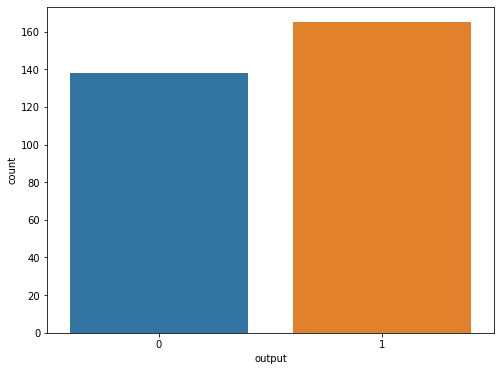

In [4]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['output']);

We see that there is no disbalance in target variable.

It is also nice practice to look on statistics and distributions of our features.

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### From here we see some useful information about our features:

    1. Min age = 29, max age = 77, mean age = 54.3, from here we see that we have no information about young people.
    2. Sex mean 0.68 means that 68% of our observations are labeled as 1 
    3. It also looks like we have no outliers (judging by the max-min values), maybe only the observation with chol = 564 is an outlier, but I will not remove it because it is very high but still achievable value.
    4. We can make some other conclusions about our data but they won't be obvious for me and for most people 

# Bivariate analysis

In this section we will look on dependency between target variable and features.

<AxesSubplot:xlabel='output', ylabel='age'>

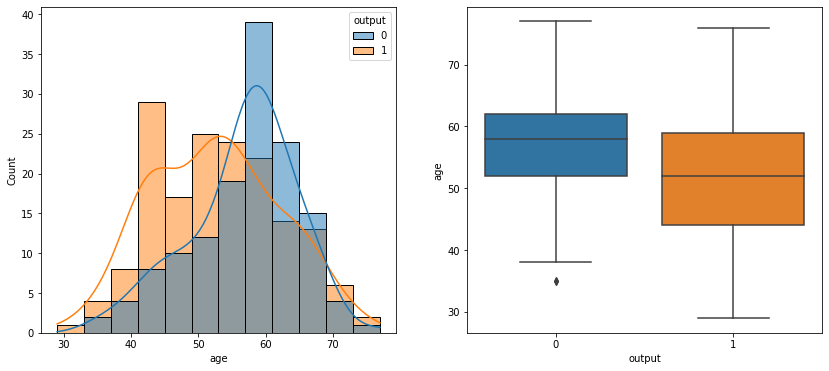

In [6]:
_,ax = plt.subplots(1,2,figsize=(14,6))

sns.histplot(data=df,x='age',hue='output',kde=True,ax=ax[0])
sns.boxplot(data=df,y='age',x='output',ax=ax[1])

From graph below we see strange thing - median age of people that are more likely to have heart attack is lower then median age of people that are less likely.

<AxesSubplot:xlabel='sex', ylabel='count'>

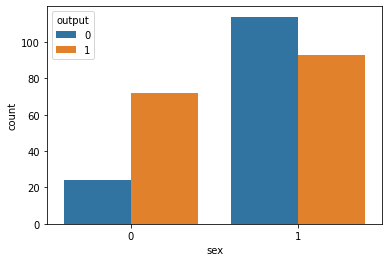

In [7]:
sns.countplot(data=df,x='sex',hue='output')

We see that sex labeled as 0 is more likely to have heart attack then sex 1.

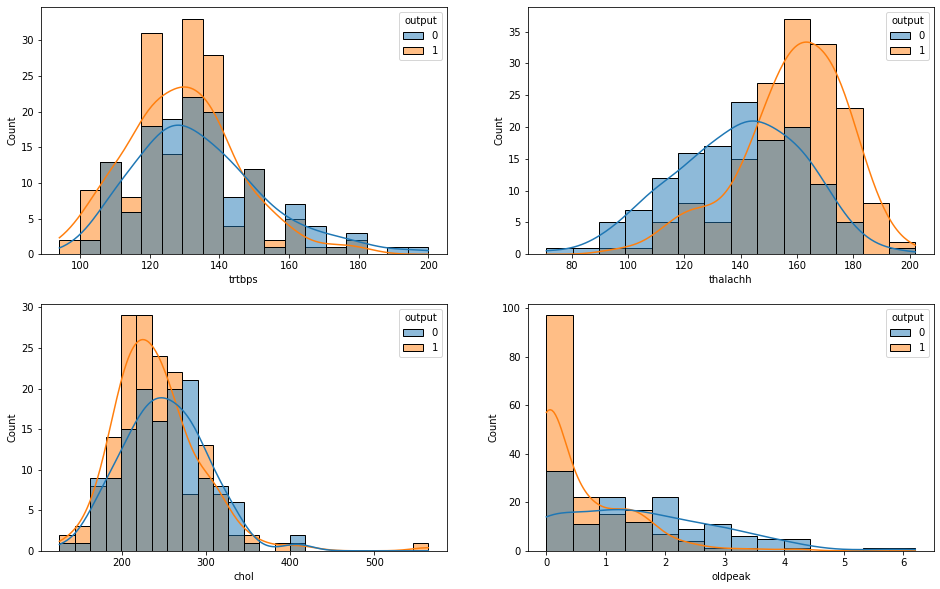

In [8]:
_,ax = plt.subplots(2,2,figsize=(16,10))
for i,x in enumerate(['trtbps','chol','thalachh','oldpeak']):
    sns.histplot(data=df,x=x,hue='output',kde=True,ax=ax[i%2][i//2])
    

From the graphs we see that all this features might be useful.

Now let's look on distribution of categorical variables. 

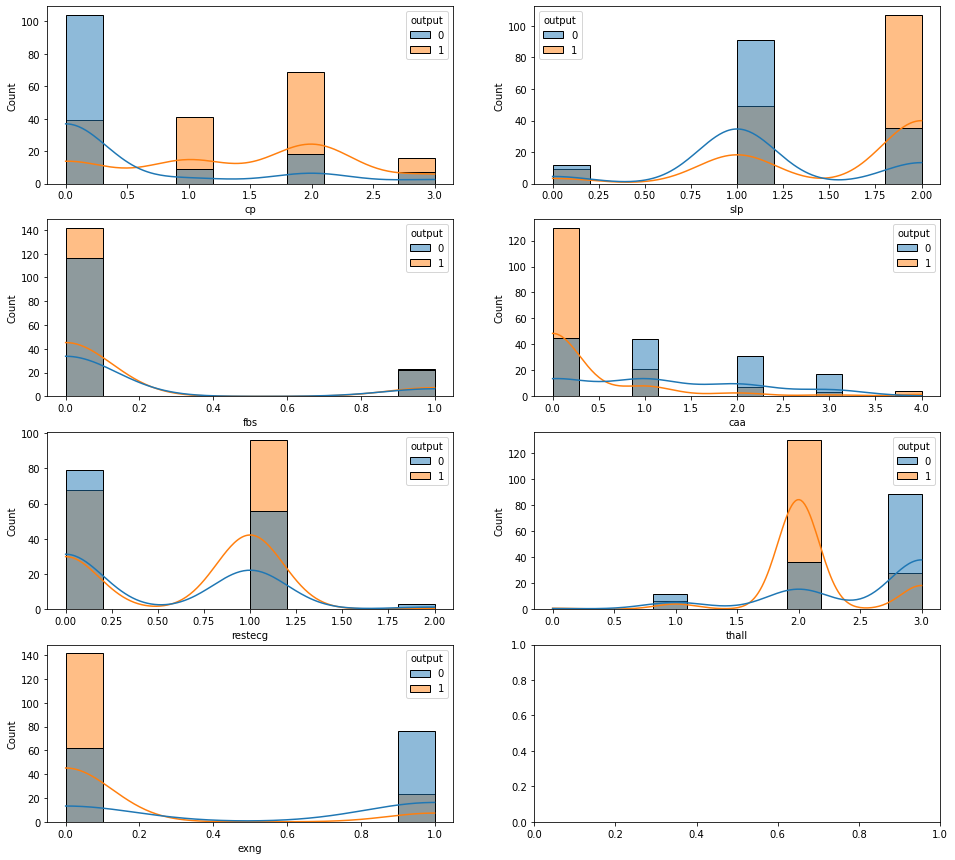

In [9]:
_,ax = plt.subplots(4,2,figsize=(16,15))
for i,x in enumerate(['cp','fbs','restecg','exng','slp','caa','thall']):
    sns.histplot(data=df,x=x,hue='output',kde=True,ax=ax[i%4][i//4])

From this graphs we can make conclusion that feature fbs might not be useful. To check this we can make two models first with this feature and  second without.

# Missing values

In [16]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In this data we don't have missing values.

# Scaling and Encoding

We want to scale our data to make all variables have similar values range. To do this we can't simply scale all data because this will lead to data leakage when we will be evaluating our model, so we have to split data on train and test set.

Encoding is used to transform (categorical) data so that model can understand it, I will use OneHotEncoding since this is ont of the best choices for linear models.

I will make pipeline for transformations using ColumnTransformer to do this I need to specify columns dtype to choose appropriate transformation for them.

In [330]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [331]:
df.dtypes

age          float64
sex         category
cp          category
trtbps       float64
chol         float64
fbs         category
restecg     category
thalachh     float64
exng        category
oldpeak      float64
slp         category
caa         category
thall       category
output         int64
dtype: object

In [332]:
df[numerical_features]=df[numerical_features].astype('float64')
df[categorical_features] = df[categorical_features].astype('category')

In [333]:
df.dtypes

age          float64
sex         category
cp          category
trtbps       float64
chol         float64
fbs         category
restecg     category
thalachh     float64
exng        category
oldpeak      float64
slp         category
caa         category
thall       category
output         int64
dtype: object

In [334]:
num_transformer = Pipeline(steps=[('scaler',StandardScaler())])

cat_transformer = Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])

transformer = ColumnTransformer(transformers=[
        ('num', num_transformer, selector(dtype_include='float64')),
        ('cat', cat_transformer, selector(dtype_include='category'))])


# Modeling

Looks like our transformer is ready now we can make some models.

In [335]:
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np

In [336]:
df_train, df_test = train_test_split(df,random_state=1)
X_test = df_test.drop(columns=['output'])
y_test = df_test.output

In [337]:
X = df_train.drop(columns=['output'])
y = df_train.output

In [338]:
def print_recall(model,message=''):
    print('-'*9)
    print(message)
    pipeline = Pipeline(steps=[('transformer',transformer),('model',model)])
    print('Recall = ',round(np.mean(cross_val_score(pipeline,X,y,scoring='recall')),5))
    print('Precision = ',round(np.mean(cross_val_score(pipeline,X,y,scoring='precision')),5))    

In [339]:
print_recall(LogisticRegression(C=0.1),'LogRegres, c = 0.1')
print_recall(LogisticRegression(C=1),'LogRegres, c = 1')
print_recall(LogisticRegression(C=10),'LogRegres, c = 10')

print_recall(SVC(C=0.1),'SVC, c = 0.1')
print_recall(SVC(C=1),'SVC, c = 1')
print_recall(SVC(C=10),'SVC, c = 10')

---------
LogRegres, c = 0.1
Recall =  0.88667
Precision =  0.84769
---------
LogRegres, c = 1
Recall =  0.84633
Precision =  0.85613
---------
LogRegres, c = 10
Recall =  0.82233
Precision =  0.83994
---------
SVC, c = 0.1
Recall =  0.88667
Precision =  0.78627
---------
SVC, c = 1
Recall =  0.87067
Precision =  0.84368
---------
SVC, c = 10
Recall =  0.84667
Precision =  0.85791


In [340]:
print_recall(KNeighborsClassifier(n_neighbors=3),'KNN, k = 3')
print_recall(KNeighborsClassifier(n_neighbors=5),'KNN, k = 5')
print_recall(KNeighborsClassifier(n_neighbors=8),'KNN, k = 8')

print_recall(RandomForestClassifier(min_samples_leaf=1),'Forest, 1 sample per leaf')
print_recall(RandomForestClassifier(min_samples_leaf=3),'Forest, 3 samples per leaf')
print_recall(RandomForestClassifier(min_samples_leaf=5),'Forest, 5 samples per leaf')

---------
KNN, k = 3
Recall =  0.83133
Precision =  0.81547
---------
KNN, k = 5
Recall =  0.88767
Precision =  0.84799
---------
KNN, k = 8
Recall =  0.82233
Precision =  0.84331
---------
Forest, 1 sample per leaf
Recall =  0.88667
Precision =  0.85781
---------
Forest, 3 samples per leaf
Recall =  0.887
Precision =  0.86014
---------
Forest, 5 samples per leaf
Recall =  0.887
Precision =  0.85201


Let's now focus on logistic regression and try to get recall equal to 0.95

In [341]:
pipeline = Pipeline(steps=[('transformer',transformer),('model',LogisticRegression(C=0.1))])

In [342]:
prob = 0.0
for p in np.linspace(0.5,0,100):
    kfold = KFold()
    recall = list()
    precision = list()
    for train_idx,test_idx in kfold.split(X):
        pipeline.fit(X.iloc[train_idx],y.iloc[train_idx])
        proba = pipeline.predict_proba(X.iloc[test_idx])
        predictions = proba[:,1] >= p
        recall.append(recall_score(y.iloc[test_idx],predictions))
        precision.append(precision_score(y.iloc[test_idx],predictions))

    if np.mean(recall) > 0.95:
        prob = p
        print('p = ', p)
        print('Recall = ', np.mean(recall))
        print('Precision = ', np.mean(precision))
        break

p =  0.3888888888888889
Recall =  0.9513917644352426
Precision =  0.7986021505376344


As we see we need threshold ~ 0.39 to get recall = 0.95 let's check results on test set.

In [343]:
pipeline.fit(X,y);

In [344]:
proba = pipeline.predict_proba(X_test)
predictions = proba[:,1] >= prob
print('Recall = ',recall_score(y_test,predictions))
print('Precision = ',precision_score(y_test,predictions))

Recall =  0.9024390243902439
Precision =  0.7551020408163265


Well, result differs a bit, but this is because we have small dataset so the split has huge influence on the metrcis.